In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df['gender'].count()
print('\n')
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [5]:
df[['occupation', 'gender', 'workclass', 'education']].value_counts()

occupation         gender  workclass    education   
Craft-repair       Male    Private      HS-grad         2155
Adm-clerical       Female  Private      HS-grad         1133
Machine-op-inspct  Male    Private      HS-grad         1085
Exec-managerial    Male    Private      Bachelors       1040
Adm-clerical       Female  Private      Some-college     992
                                                        ... 
Priv-house-serv    Female  Private      Masters            1
                                        Doctorate          1
Craft-repair       Female  Federal-gov  11th               1
Other-service      Male    State-gov    Prof-school        1
Transport-moving   Male    Without-pay  HS-grad            1
Length: 1300, dtype: int64

In [6]:
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df['occupation']).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df['workclass']).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital_status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df['relationship']).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df['race']).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)

In [7]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [8]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [9]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [10]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital_status_Divorced', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent',
       'mari

<AxesSubplot:>

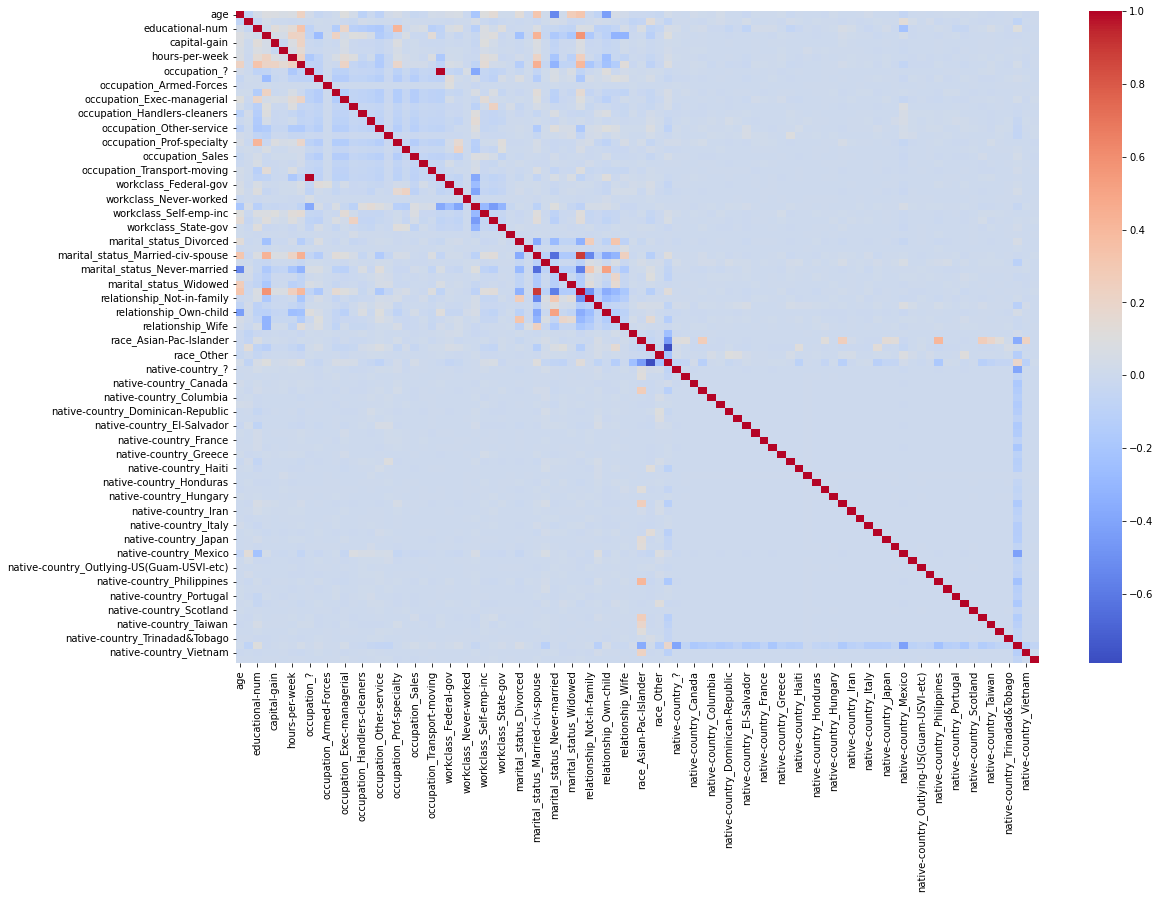

In [11]:
plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

In [12]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [13]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [14]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

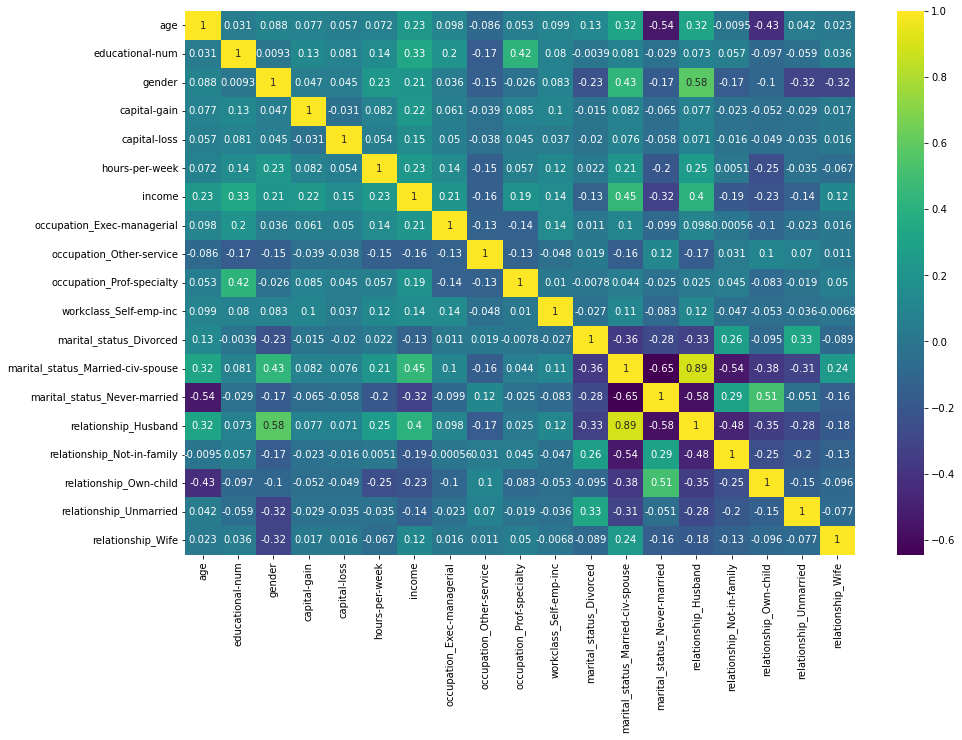

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'viridis')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [19]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
19121,44,15,1,14084,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31408,51,10,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16955,50,9,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30798,43,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44551,63,13,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25710,27,13,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
46539,54,10,1,0,2415,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10321,41,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43387,32,9,1,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
45579,60,9,1,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33311,20,10,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10497,52,6,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1993,30,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33611,47,14,1,99999,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19686,47,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23324,41,16,0,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17483,37,13,1,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38878,23,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
train_X = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_X = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [22]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [23]:
forest.score(test_X, test_y)

0.8485003582761798

In [24]:
forest.feature_importances_

array([2.27484609e-01, 1.28721884e-01, 1.26658421e-02, 1.05738951e-01,
       3.69610961e-02, 1.16055547e-01, 1.92043301e-03, 4.87975787e-03,
       8.33562074e-05, 6.36572218e-03, 1.91942481e-02, 4.29315209e-03,
       3.65374793e-03, 4.48408383e-03, 7.83174250e-03, 1.72840148e-04,
       1.81418009e-02, 2.94465310e-03, 6.14409162e-03, 4.22172637e-03,
       4.33041225e-03, 1.84155330e-03, 4.98349226e-03, 5.49288926e-03,
       4.64132556e-06, 9.24128403e-03, 6.31687475e-03, 8.05803837e-03,
       4.18231304e-03, 1.58315456e-04, 7.20831137e-03, 3.48748967e-04,
       6.28501385e-02, 1.05661682e-03, 2.60235133e-02, 1.91840525e-03,
       1.72568326e-03, 5.82127798e-02, 1.13216236e-02, 1.80017997e-03,
       1.12206185e-02, 5.88037113e-03, 1.01688529e-02, 1.42272893e-03,
       3.16620548e-03, 4.95732357e-03, 1.04921436e-03, 6.16868811e-03,
       2.86686898e-03, 4.12175916e-04, 1.43851259e-03, 5.64027228e-04,
       2.24833640e-04, 8.24665035e-04, 2.05526478e-04, 1.23249938e-04,
      

In [25]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital_status_Divorced', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent',
       'marital_status_Never-mar

In [26]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}

importances

{'age': 0.22748460900764933,
 'educational-num': 0.12872188410601523,
 'hours-per-week': 0.11605554683894774,
 'capital-gain': 0.10573895127239091,
 'marital_status_Married-civ-spouse': 0.06285013845717093,
 'relationship_Husband': 0.058212779784570866,
 'capital-loss': 0.03696109606031446,
 'marital_status_Never-married': 0.026023513263446384,
 'occupation_Exec-managerial': 0.01919424811050768,
 'occupation_Prof-specialty': 0.018141800888223262,
 'gender': 0.012665842123288,
 'relationship_Not-in-family': 0.011321623559141956,
 'relationship_Own-child': 0.01122061854742768,
 'relationship_Wife': 0.010168852879631249,
 'workclass_Private': 0.009241284033936373,
 'workclass_Self-emp-not-inc': 0.008058038365186603,
 'occupation_Other-service': 0.007831742501262416,
 'marital_status_Divorced': 0.007208311370427398,
 'occupation_Craft-repair': 0.0063657221775981964,
 'workclass_Self-emp-inc': 0.006316874746204067,
 'native-country_United-States': 0.006228437603710699,
 'race_White': 0.0061

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                          param_grid = param_grid, verbose = 10)

In [30]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   1.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   1.2s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   1.0s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.813 total time=   1.4s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.816 total time=   1.4s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.812 total time=   4.2s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.815 total time=   3.8s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.821 total time=   4.6s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.854 total time=   2.2s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.859 total time=   1.9s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.861 total time=   1.6s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.856 total time=   4.3s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.861 total time=   4.5s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.851 total time=   7.9s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.856 total time=   6.6s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.850 total time=   7.4s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   6.3s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.860 total time=   8.7s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.858 total time=   2.9s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.861 total time=   2.9s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   7.0s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   6.0s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.855 total time=   6.9s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.851 total time=  19.7s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.844 total time=  20.3s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.846 total time=  26.4s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.855 total time=  20.9s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.858 total time=   3.6s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   8.3s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.857 total time=   8.3s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.847 total time=   7.5s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [31]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [32]:
forest1 = grid_search.best_estimator_
forest1.score(test_X, test_y)


0.8661070733954346

In [33]:
importances = dict(zip(forest1.feature_names_in_, forest1.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}

importances

{'age': 0.1488721853357686,
 'educational-num': 0.12940584958914123,
 'capital-gain': 0.1285890404976113,
 'hours-per-week': 0.09098481239977457,
 'marital_status_Married-civ-spouse': 0.08856975454961322,
 'relationship_Husband': 0.057477374755980214,
 'capital-loss': 0.04356794660440489,
 'marital_status_Never-married': 0.03461880179264388,
 'occupation_Exec-managerial': 0.025292620978510108,
 'occupation_Prof-specialty': 0.023878521828858048,
 'relationship_Not-in-family': 0.018853565765726266,
 'gender': 0.016885483800175332,
 'relationship_Own-child': 0.015572365403933738,
 'relationship_Wife': 0.012649738389509939,
 'occupation_Other-service': 0.010461115020949138,
 'marital_status_Divorced': 0.00995291459565963,
 'relationship_Unmarried': 0.008685253469192208,
 'workclass_Self-emp-not-inc': 0.008169712402627921,
 'workclass_Private': 0.008148653457045832,
 'workclass_Self-emp-inc': 0.007557299005811557,
 'native-country_United-States': 0.005991179225395423,
 'race_White': 0.00562